In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pdp
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier

In [57]:
train =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
test =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\test.csv')

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# cheaking the missing value and NaN value

In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

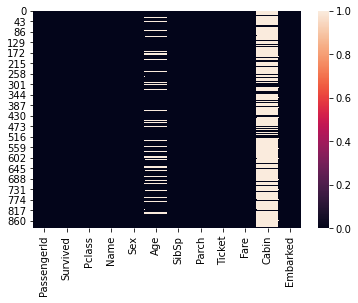

In [63]:
sns.heatmap(train.isnull())

In [64]:
train['Sex'].replace({'male':0,'female':1},inplace=True)
train['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)

In [65]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,1.0


In [66]:
train['title']=0
for i in range(0,len(train)):
    train.loc[i,'title']=train['Name'].iloc[i].split(',')[1].split('.')[0][1:]
train['title'].replace({'Mr':1,'Miss':2,'Mrs':2,'Master':3,'Dr':4,'Rev':5},inplace=True)
train['title'].replace(['Major','Mlle','Col','Don','the Countess','Sir','Capt','Mme','Lady','Jonkheer','Ms'],6,inplace=True)


In [67]:
train['family']=train['SibSp']+train['Parch']+1
def family(size):
    a=''
    if(size<=1):
        a=1    #Alone
    elif(size<=2):
        a=2    #Couple
    elif(size<=4):
        a=3    #small family
    elif(size<=6):
        a=4   #medium amilhy
    else:
        a=5   #large family
    return a
train['family']=train['family'].map(family)

In [68]:
for i in range(len(train)):
    if not(pd.isnull(train['Cabin'].iloc[i])):
        train.loc[i,'Cabin']=train['Cabin'].loc[i][0]
train['Cabin'].replace({'C':1,'B':2,'D':3,'E':4,'A':5,'F':6,'G':7,'T':8},inplace=True)
train['Fare']=np.sqrt(train['Fare'])

In [69]:
train.drop(['Name','SibSp','Parch','Ticket','PassengerId','Cabin'],axis=1,inplace=True)


In [70]:
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,title,family
0,0,3,0,22.0,2.692582,1.0,1,2
1,1,1,1,38.0,8.442944,2.0,2,2
2,1,3,1,26.0,2.815138,1.0,2,1


# data visulization

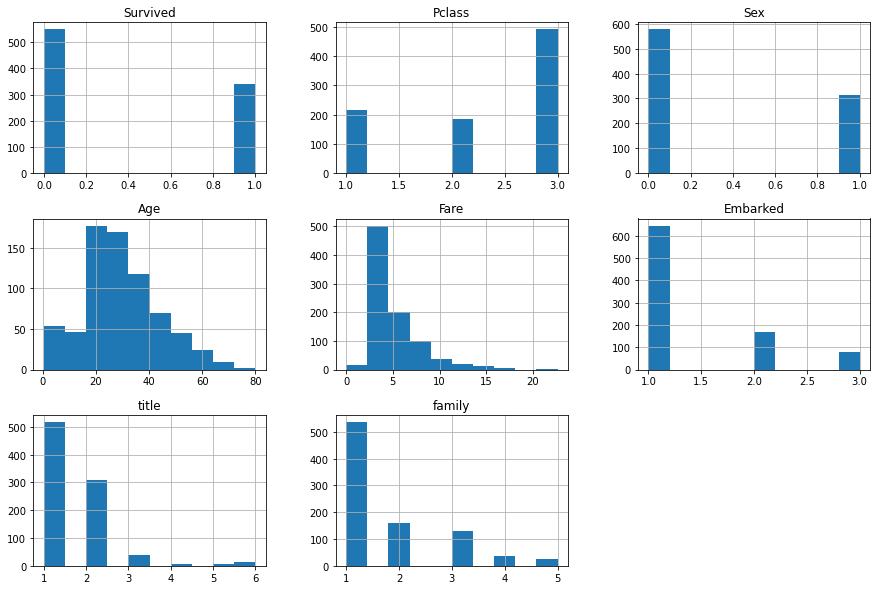

In [71]:
train.hist(figsize=(15,10))
plt.show()

<AxesSubplot:>

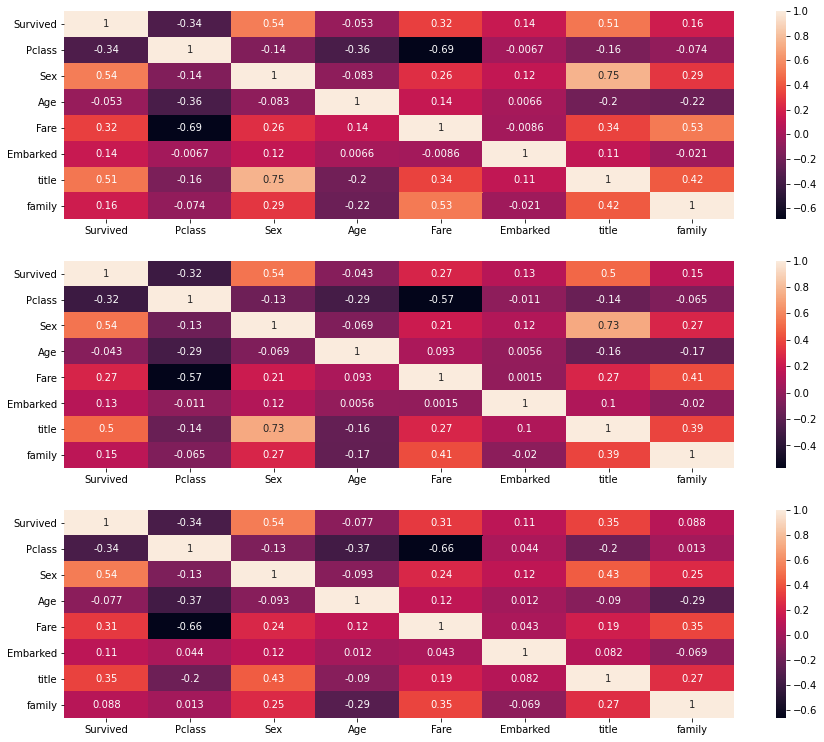

In [72]:
fig,ax=plt.subplots(3,1,figsize=(15,13))
sns.heatmap(train.corr('spearman'),annot=True,ax=ax[0],label='spearman')    #spearman 
sns.heatmap(train.corr('kendall'),annot=True,ax=ax[1],label='kendall')      #Kendall
sns.heatmap(train.corr('pearson'),annot=True,ax=ax[2],label='pearson')      #pearson  


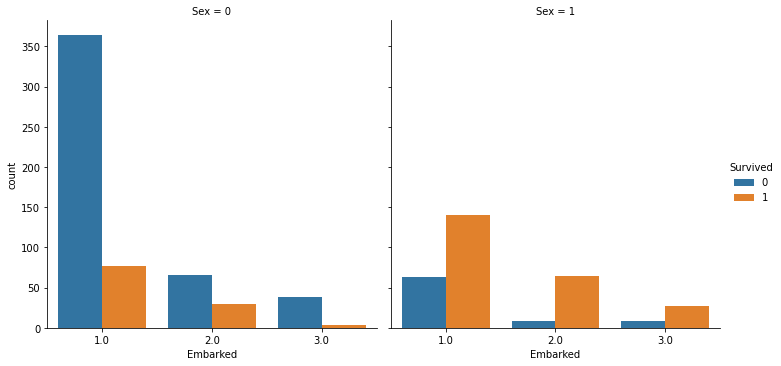

In [73]:
sns.catplot(x='Embarked',data=train,kind='count',hue='Survived',col='Sex')  
# -----> Male from Southampton has lesser chance to survive
# -----> Female mostly from 1st and 2nd class a lot more chance to survive
                       

<AxesSubplot:xlabel='family', ylabel='count'>

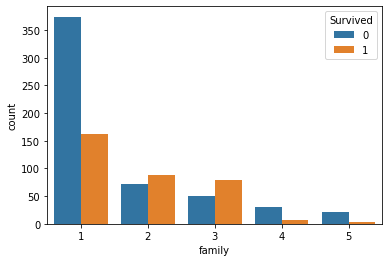

In [74]:
sns.countplot(x='family',data=train,hue='Survived') # small family has more chance to survive of size 2 and 3

<AxesSubplot:xlabel='title', ylabel='count'>

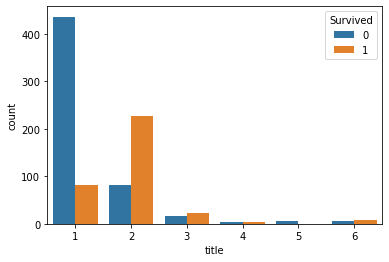

In [75]:
sns.countplot(x='title',data=train,hue='Survived')  # women has a lot more chance to survive according to title

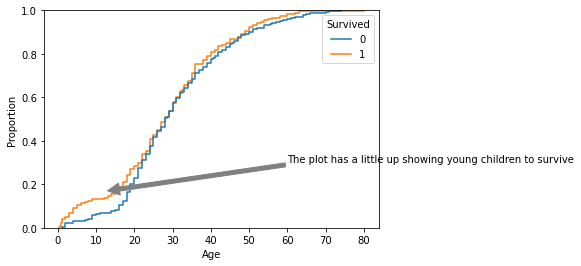

In [76]:
sns.ecdfplot(x='Age',data=train,hue='Survived')
plt.annotate('The plot has a little up showing young children to survive',xy=(13,0.17),xytext=(60,0.3),arrowprops=({'color':'gray'}))
plt.show()


In [77]:
train=pd.get_dummies(train,columns=['Pclass','Embarked','title','family'],drop_first=True)

impute=KNNImputer(n_neighbors=13)
train=pd.DataFrame(impute.fit_transform(train),columns=train.columns)

In [78]:
train

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_2.0,Embarked_3.0,title_2,title_3,title_4,title_5,title_6,family_2,family_3,family_4,family_5
0,0.0,0.0,22.0,2.692582,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,38.0,8.442944,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,26.0,2.815138,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,35.0,7.286975,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,35.0,2.837252,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,27.0,3.605551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
887,1.0,1.0,19.0,5.477226,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,1.0,23.0,4.842520,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
889,1.0,0.0,26.0,5.477226,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# model selection

In [79]:
model=[]
model.append(('Logistic Regression',LogisticRegression(max_iter=1000)))
model.append(('LDA',LinearDiscriminantAnalysis()))
model.append(('SVC',SVC(kernel='rbf')))
model.append(('DTC',DecisionTreeClassifier()))
model.append(('GBC',GradientBoostingClassifier()))
model.append(('RFC',RandomForestClassifier()))
model.append(('Kneig',KNeighborsClassifier()))


x=train.drop('Survived',axis=1)   
y=train['Survived']
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.3)

In [80]:
scores=[]

for name,models in model:
    pipeline=Pipeline(steps=[('scale',MinMaxScaler()),('model',models)])
    cv=StratifiedKFold(n_splits=10,random_state=21,shuffle=True)
    score=cross_val_score(pipeline,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
    scores.append((name,np.mean(score)))
   
    
scores

[('Logistic Regression', 0.8272159800249688),
 ('LDA', 0.82832709113608),
 ('SVC', 0.8238077403245943),
 ('DTC', 0.7845443196004994),
 ('GBC', 0.8361423220973784),
 ('RFC', 0.8036579275905119),
 ('Kneig', 0.8159300873907617)]

In [81]:
from sklearn.metrics import classification_report

model=LogisticRegression(max_iter=3000)
model.fit(xtrain,ytrain)
ypred=model.predict(xvalid)
print(classification_report(yvalid,ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       157
         1.0       0.77      0.64      0.70       111

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [82]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xvalid)
print(classification_report(yvalid,ypred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       157
         1.0       0.84      0.69      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [83]:
estimator = []
estimator.append(('LR', GradientBoostingClassifier()))
estimator.append(('SVC', RandomForestClassifier()))
estimator.append(('kd',LogisticRegression(max_iter=3000)))



  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(xtrain, ytrain)
ypred=vot_hard.predict(xvalid)
print(classification_report(yvalid,ypred))

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       157
         1.0       0.83      0.64      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [84]:
pipeline=Pipeline(steps=[('scale',MinMaxScaler()),('jj',SelectKBest(score_func=mutual_info_classif,k=13)),('model',VotingClassifier(estimators = estimator, voting ='hard'))])
cv=StratifiedKFold(n_splits=10,random_state=21,shuffle=True)
pipeline.fit(x,y)
ypred=pipeline.predict(xvalid)
print(classification_report(yvalid,ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       157
         1.0       0.93      0.77      0.84       111

    accuracy                           0.88       268
   macro avg       0.89      0.86      0.87       268
weighted avg       0.89      0.88      0.88       268



In [85]:
"""from sklearn.model_selection import GridSearchCV

metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10,scoring='accuracy', refit=True)
grid_search.fit(x, y)
print(grid_search.best_params_)"""

"from sklearn.model_selection import GridSearchCV\n\nmetrics = ['euclidean','manhattan'] \nneighbors = np.arange(1, 16)\nparam_grid  = dict(metric=metrics, n_neighbors=neighbors)\nknn = KNeighborsClassifier()\n\ngrid_search = GridSearchCV(knn, param_grid, cv=10,scoring='accuracy', refit=True)\ngrid_search.fit(x, y)\nprint(grid_search.best_params_)"

In [86]:
"""from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, x.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 500)}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                                   n_iter=10, cv=5, iid=False, random_state=42)
random_search.fit(x,y)
print(random_search.best_params_)"""

'from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint as sp_randint\n\n\nparam_dist = {"max_depth": [3, None],\n              "max_features": sp_randint(1, x.shape[1]),\n              "min_samples_split": sp_randint(2, 11),\n              "bootstrap": [True, False],\n              "n_estimators": sp_randint(100, 500)}\n\nrandom_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,\n                                   n_iter=10, cv=5, iid=False, random_state=42)\nrandom_search.fit(x,y)\nprint(random_search.best_params_)'

In [87]:
"""gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = GradientBoostingClassifier(n_estimators = 600)

clf =GridSearchCV(gb_gs,
                               gb_grid_params,
                               cv=2,
                               scoring='accuracy', 
                               n_jobs=10);
clf.fit(x,y)
print(clf.best_params_)"""

"gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],\n              'max_depth': [4, 6, 8],\n              'min_samples_leaf': [20, 50,100,150],\n              'max_features': [1.0, 0.3, 0.1] \n              }\nprint(gb_grid_params)\n\ngb_gs = GradientBoostingClassifier(n_estimators = 600)\n\nclf =GridSearchCV(gb_gs,\n                               gb_grid_params,\n                               cv=2,\n                               scoring='accuracy', \n                               n_jobs=10);\nclf.fit(x,y)\nprint(clf.best_params_)"

In [88]:
test['Sex'].replace({'male':0,'female':1},inplace=True)
test['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)
test['title']=0
test['Fare']=np.sqrt(test['Fare'])
for i in range(0,len(test)):
    test.loc[i,'title']=test['Name'].iloc[i].split(',')[1].split('.')[0][1:]
test['title'].replace({'Mr':1,'Miss':2,'Mrs':2,'Master':3,'Dr':4,'Rev':5},inplace=True)
test['title'].replace(['Major','Mlle','Col','Don','the Countess','Sir','Capt','Mme','Lady','Jonkheer','Ms','Dona'],7,inplace=True)
test['family']=test['SibSp']+test['Parch']+1
test['family']=test['family'].map(family)

for i in range(len(test)):
    if not(pd.isnull(test['Cabin'].iloc[i])):
        test.loc[i,'Cabin']=test['Cabin'].loc[i][0]
test.drop(['Name','SibSp','Parch','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

test=pd.get_dummies(test,columns=['Pclass','Embarked','title','family'],drop_first=True)

test=pd.DataFrame(impute.fit_transform(test),columns=test.columns)

In [91]:
submit_df = pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\gender_submission.csv')
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [89]:
submit_df['Survived']=pipeline.predict(test).astype(int)
submit_df.to_csv('data.csv',index=False)
submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
submit_df = pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\gender_submission.csv')

In [25]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier